# Lab 3

## Intro:
On this Laboratory session we are going to work with affine transformations and camera prjections.
Create a zip File with the next structure: Surname_YourName_Lab4.zip with your solutions inside.
Make one file per exercise, and provide comments about your procedure.
You have to deliver this assignment on the digital campus before: XXth at  23:45h.

---
Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

## Exercise 1:

The point p has coordinates $^A p = (3, 4)^T$ on a frame {$A$} and coordinates $^B p = (-2.5, 0.5)^T$ on a frame {$B$}. It is known that the angle between axis of frame {$A$} and the axes of frame {$B$} is 30deg counterclockwise.



In [3]:
A_p = np.atleast_2d([3, 4]).T
B_p = np.atleast_2d([-2.5, 0.5]).T
angle = 30 #degrees

### 1.1
Which are the coordinates of the origin of {$A$} as seen from {$B$}?

In [4]:

rotBA = np.array([[np.cos(np.radians(angle)),np.sin(np.radians(angle))],[-np.sin(np.radians(angle)),np.cos(np.radians(angle))]])
BdBA = -(rotBA@B_p - B_p);

print(BdBA)



[[-0.58493649]
 [-1.1830127 ]]


### 1.2

Which are the coordinates of the origin of {$B$} seen from {$A$}?

In [5]:

rotAB = np.array([[np.cos(np.radians(angle)),-np.sin(np.radians(angle))],[np.sin(np.radians(angle)),np.cos(np.radians(angle))]])
AdAB = -(rotAB@B_p - A_p);
print(AdAB)


[[5.41506351]
 [4.8169873 ]]


### 1.3
Which are the coordinates of a point q expressed in {$A$} if $^B q = (-2.5, 0.5)^T$

In [6]:
B_q = np.atleast_2d([-2.5, 0.5]).T

A_q = rotAB@B_q + BdBA;
print(A_q)



[[-3.]
 [-2.]]


---

## Exercise 2

Let {$A$}, {$B$} and {$C$} to be 3 different reference frames. From them we know that:

- The origin of {$B$} seen from {$A$} is $^A o_B = (3,1,-2)^{T}$
- The origin of {$C$} seen from {$B$} is  $^B o_C = (-3,1,-2)^{T}$
- The three frames has different orientations in space. In fact:
  - The set of Euler angles stored in $\eta$ as $\eta = (\psi, \theta, \phi)^T$ with $\eta = (25, 145, 30)^T$ (in degrees)represents 3 consecutive rotations about z, y, and x respectively that allows to transform from {$B$} to {$A$} (only rotation) as $^Av =  \,^A{\bf{R}}_B \, ^Bv  = {\bf{R}}(\psi,\theta,\varphi)  \, ^Bv$
  - The quaternion $\mathring{q} = \frac{1}{7}(-3.5\sqrt{3}, 3, -1, -1.5)^T$ allows to express in {$B$} a vector defined in {$C$}, if {$B$} and {$C$} had the same origin

Let in addition $^C v_1 = (0,2,0)^{T} $ and $^C v_2 = (0,2,5)^{T}$ to be points which coordinates are known in {$C$}

In [7]:
A_O_B = np.atleast_2d([3,1,-2]).T
B_O_C = np.atleast_2d([-3,1,-2]).T
eta = np.array([25,145,30]) # In degrees
q = 1/7* np.atleast_2d([-3.5*np.sqrt(3), 3, -1, -1.5]).T
C_v1 = np.atleast_2d([0, 2, 0]).T
C_v2 = np.atleast_2d([0, 2, 5]).T



With the information provided above, provide:

### 2.1
The affine expression (Formula! no matrix here) that allows to relate a vector originally given in {$C$} to {$B$}

Si {B} y {C} tienen el mismo origen:
$^B v$ = q*$^Cv$*q̃  +$^CD_C→_B$

### 2.2
 The affine matrix that allows to express a vector originally given in {$C$} to {$A$}

In [9]:

def quaternion_rotation_matrix(Q):


    q0 = Q[0]
    q1 = Q[1]
    q2 = Q[2]
    q3 = Q[3]


    r00 = q0**2 + q1**2 - q2**2 - q3**2
    r01 = 2 * (q1*q2) - 2*(q0*q3)
    r02 = 2 * (q1*q3) + 2*(q0*q2)


    r10 = 2 * (q1*q2) + 2*(q0*q3)
    r11 = q0**2 - q1**2 + q2**2 - q3**2
    r12 = 2 * (q2*q3) - 2*(q0*q1)


    r20 = 2 * (q1*q3) - 2*(q0*q2)
    r21 = 2 * (q2*q3) + 2*(q0*q1)
    r22 = q0**2 - q1**2 - q2**2 + q3**2


    rot_matrix = np.array([[r00, r01, r02],
                           [r10, r11, r12],
                           [r20, r21, r22]])

    return rot_matrix


def eAngles2rotM(yaw,pitch,roll): #psi ψ, theta θ , phi φ
    '''
    Given a set of Euler angles returns the rotation matrix R
    '''
    ψ = yaw * np.pi/180;
    θ = pitch* np.pi/180;
    φ = roll* np.pi/180;

    R = np.array([[ np.cos(θ) * np.cos(ψ), np.cos(ψ)*np.sin(θ)*np.sin(φ) - np.cos(φ)*np.sin(ψ), np.cos(ψ)*np.cos(φ)*np.sin(θ) + np.sin(ψ)*np.sin(φ)],
                  [ np.cos(θ) * np.sin(ψ), np.sin(ψ)*np.sin(θ)*np.sin(φ) + np.cos(φ)*np.cos(ψ), np.sin(ψ)*np.sin(θ)*np.cos(φ) - np.cos(ψ)*np.sin(φ)],
                  [ -np.sin(θ), np.cos(θ)*np.sin(φ), np.cos(θ)*np.cos(φ)]
                  ])



    return R




CRB = quaternion_rotation_matrix(q).reshape((3, 3));
BRA = eAngles2rotM(eta[0], eta[1], eta[2]);
CRA = CRB@BRA


d_C_A = np.zeros((3, 1));
d_C_A[0] = A_O_B[0] * B_O_C[0] + A_O_B[0] * B_O_C[1] + A_O_B[0] * B_O_C[2];
d_C_A[1] = A_O_B[1] * B_O_C[0] + A_O_B[1] * B_O_C[1] + A_O_B[1] * B_O_C[2];
d_C_A[2] = A_O_B[2] * B_O_C[0] + A_O_B[2] * B_O_C[1] + A_O_B[2] * B_O_C[2];

#d_C_A = np.invert((A_O_B@B_O_C) )


Av = np.zeros((4, 4));
Av[0][0] = CRA[0][0]
Av[0][1] = CRA[0][1]
Av[0][2] = CRA[0][2]
Av[1][0] = CRA[1][0]
Av[1][1] = CRA[1][1]
Av[1][2] = CRA[1][2]
Av[2][0] = CRA[2][0]
Av[2][1] = CRA[2][1]
Av[2][2] = CRA[2][2]

Av[3][3] = 1


Av[0][3] = d_C_A[0]
Av[1][3] = d_C_A[1]
Av[2][3] = d_C_A[2]

print("The affine matrix that allows to express a vector originally given in { C } to { A } is:")
print(Av)

The affine matrix that allows to express a vector originally given in { C } to { A } is:
[[ -0.50961467  -0.56537075   0.64857444 -12.        ]
 [ -0.83275084   0.13453694  -0.53705292  -4.        ]
 [  0.21637679  -0.81379096  -0.53937497   8.        ]
 [  0.           0.           0.           1.        ]]


C:\Users\aitra\AppData\Local\Temp\ipykernel_19696\1463021848.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Av[0][3] = d_C_A[0]
C:\Users\aitra\AppData\Local\Temp\ipykernel_19696\1463021848.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Av[1][3] = d_C_A[1]
C:\Users\aitra\AppData\Local\Temp\ipykernel_19696\1463021848.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Av[2][3] = d_C_A[2]


### 2.3
The coordinates of the vectors $^C v_1$ and $^C v_2$ in frames {$A$} and {$B$}

In [10]:
A_v1 = CRA@C_v1;
A_v2 = CRA@C_v2;
B_v1 = CRB@C_v1;
B_v2 = CRB@C_v2;


print("A_v1:")
print(A_v1)
print("A_v2:")
print(A_v2)
print("B_v1:")
print(B_v1)
print("B_v2:")
print(B_v2)


A_v1:
[[-1.13074149]
 [ 0.26907389]
 [-1.62758192]]
A_v2:
[[ 2.1121307 ]
 [-2.41619073]
 [-4.32445676]]
B_v1:
[[-0.98720545]
 [ 1.08163265]
 [-1.362166  ]]
B_v2:
[[-0.66839365]
 [ 5.09929255]
 [ 1.59701768]]


---

## Exercise 3

The points described by the columns of the matrix A are points contained into a circle, and they are defined in a world frame {$W$}. A camera is situated at point $^W c = (11, 6, 1)^T$ defined in the world frame. Moreover the orientation of this camera frame is achieved by rotating the world frame -90deg about its $y$ axis followed by -20deg about the resulting $z$ axis. If the camera has a focal length $f = \frac{1}{34}$ m:

In [88]:

A = np.load("ex3.npy")
print("First 5 columns of A")
print(A[:,0:5])
w_C = np.atleast_2d([11, 6, 1]).T
alpha1 = -90 # deg abput y
alpha2 = -20 # deg abput z
f = 1.0/34 # m

First 5 columns of A
[[6.90630779 6.90178002 6.88824197 6.8658289  6.83476475]
 [6.         6.09983342 6.19866933 6.29552021 6.38941834]
 [1.57738174 1.57949307 1.58580597 1.59625735 1.6107428 ]]


### 3.1
Implement a function that takes as argument the World to Camera afine matrix, the focal distance and a list of 3D points in the world frame and returns a list of 2D points projected on the camera plane

In [89]:
def W_to_Cam_proj(CAW, f, p3D):

    p2d = np.zeros((2,1))
    
    #x
    p2d[0] = CAW[0]/p3D[0] * f
    p2d[1] = CAW[1]/p3D[1] * f

    return p2d

### 3.2
Make a plot with the view of the points of the circle projected into the camera plane.

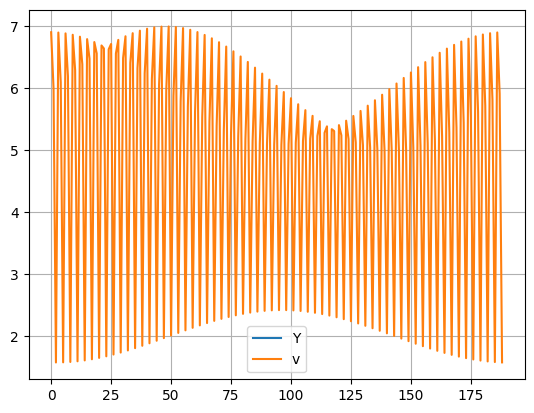

In [59]:
x = w_C
y = np.zeros((0,2))



for i in range(A[0].size):
        y = np.append(y, np.array([[A[0][i],A[1][i],A[2][i]]]))


fig = plt.figure(1)	#identifies the figure 
plt.plot(np.array(x[0]), np.array(x[1]), y)	#plot the points
plt.legend(('YvsX'),loc='best')	#creates a legend to identify the plot
plt.savefig('Y_X.png')	#saves the figure in the present directory
plt.grid()	#shows a grid under the plot
plt.show()

### 3.2
Make also a 3D plot where all the scene is drawn in the world coordinates. The scene must contain the 2 reference frames (2 orthogonal sets of vectors) and the circle points. You have an example of how to draw axis at the end of this netebook.

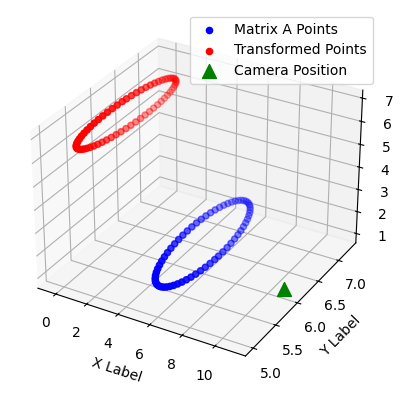

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Project points from world coordinates to camera coordinates
transform1 = np.array([[np.cos(np.radians(alpha2)), -np.sin(np.radians(alpha2)), 0],
                      [np.sin(np.radians(alpha2)), np.cos(np.radians(alpha2)), 0],
                      [0, 0, 1]])

transform2 = np.array([[np.cos(np.radians(alpha1)), 0, np.sin(np.radians(alpha1))],
                      [0, 1, 0],
                      [-np.sin(np.radians(alpha1)), 0, np.cos(np.radians(alpha1))]])

transformed_points = np.dot(transform1, np.dot(transform2, A))

# Plot points in Matrix A
ax.scatter(A[0, :], A[1, :], A[2, :], label='Matrix A Points', marker='o', color='b')

# Plot points after transformation
ax.scatter(transformed_points[0, :], transformed_points[1, :], transformed_points[2, :],
           label='Transformed Points', marker='o', color='r')

# Project points from world coordinates to camera coordinates for w_C
w_C_proj = W_to_Cam_proj(w_C, f, w_C)

# Plot the camera position
ax.scatter(w_C[0, 0], w_C[1, 0], w_C[2, 0], label='Camera Position', marker='^', color='g', s=100)

# Add labels and other settings as needed
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()

# Show plot
plt.show()



---

## Exercise 4

The columns of the matrix $A$, represents the coordinates of 4 points defined in a world frame. From this 4 points, two segments are defined. The segment one, goes from the point defined by the first column to the point defined by the second column. The second segment is defined by the other two points.

A camera frame is seeing the scene. The origin of the world frame seen from the camera frame is given by the vector $^C w = (4.665, 3.735, -0.5395)^T$. And the orientation of the camera frame is obtained after rotating the world frame $-170$deg about the direction $u = (0.01, -0.2, 1)^T$


In [91]:
A = np.load('ex4.npy')
print(A)
C_w = np.atleast_2d([4.665, 3.735, -0.5395]).T
angle = -170 # degrees
u = np.atleast_2d([0.01,-.2,1]).T


[[0.91147867 3.72073483 1.96592583 2.66628767]
 [1.93969262 2.87938524 1.         3.81907786]
 [3.33036609 4.43718931 3.25881905 4.50873636]]




With the data provided determine:
### 4.1 The minimum angle that both segments forms (hint, they intersect)

In [98]:
v01 = A[:, 1] - A[:, 0]
v23 = A[:, 3] - A[:, 2]

v01_norm = v01/np.linalg.norm(v01)
v23_norm = v23/np.linalg.norm(v23)

angleRad = np.arccos(v01_norm@v23_norm)
angleDeg = angleRad * 180 / np.pi

print("El angulo minimo entre los dos segmentos es de:")
print(angleDeg)



El angulo minimo entre los dos segmentos es de:
53.13010235415598


### 4.2
  The angle that both segments forms in the image plane

In [141]:
def Eaa2rotM(angle, axis):
    '''
    Returns the rotation matrix R able to rotate vectors an angle 'angle' (in rads) about the axis 'axis'
    Axis = X Y Z
    '''
    axis_norm = np.linalg.norm(axis)

    if axis_norm > 1:
        axis = axis / axis_norm

    Ux = np.array([[0, -axis[2, 0], axis[1, 0]], [axis[2, 0], 0, -axis[0, 0]], [-axis[1, 0], axis[0, 0], 0]])
    R = np.eye(3) * np.cos(np.radians(angle)) + (1 - np.cos(np.radians(angle))) * np.outer(axis, axis) + np.sin(np.radians(angle)) * Ux
    return R



#RM = np.eye(3) + np.sin(np.radians(angle)) * np.cross(np.eye(3), u.squeeze()) + (1 - np.cos(np.radians(angle))) * np.outer(u.squeeze(), u.squeeze()) #REHACER
RM = Eaa2rotM(angle, u)

v01_C = v01 -C_w.T
v01_C = RM@v01_C.T
v23_C = v23 -C_w.T
v23_C = RM@v23_C.T

v01_Pc = v01_C[:2]
v23_Pc = v23_C[:2]


v01_Pc_norm = v01_Pc/np.linalg.norm(v01_Pc)
v23_Pc_norm = v23_Pc/np.linalg.norm(v23_Pc)

angleRad = np.arccos(v01_Pc_norm[0]@v23_Pc_norm[0])
angleDeg = angleRad * 180 / np.pi



print("El angulo minimo entre los dos segmentos en el plano de la imagen es de:")
print(angleDeg)


El angulo minimo entre los dos segmentos en el plano de la imagen es de:
57.91544831664654


---

---

## Hints

### Representing scenes in 3d with matplotlib

In 3D scenes have to be drawn from one (unique) reference frame, hence all the scene points have to be transformed to it previously to plot.

The current sceene has two frames.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Wdwc = np.atleast_2d([4, 0, 0]).T

CRW = np.array([[1, 0, 0],
                [0, 0, -1],
                [0, 1, 0]])

CAW = np.concatenate((CRW, -CRW@Wdwc),axis=1)
CAW = np.concatenate((CAW, np.array([[0, 0, 0, 1]])),axis=0)
print(CAW)

WAC  = np.concatenate((CRW.T, Wdwc),axis=1)
WAC = np.concatenate((WAC, np.array([[0, 0, 0, 1]])),axis=0)
print(WAC)




[[ 1  0  0 -4]
 [ 0  0 -1  0]
 [ 0  1  0  0]
 [ 0  0  0  1]]
[[ 1  0  0  4]
 [ 0  0  1  0]
 [ 0 -1  0  0]
 [ 0  0  0  1]]


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [67]:
origin = np.atleast_2d([0,0,0]).T
xaxis = np.atleast_2d([1,0,0]).T
yaxis = np.atleast_2d([0,1,0]).T
zaxis = np.atleast_2d([0,0,1]).T

Cx = WAC@np.append(xaxis, np.array([[1]]), axis=0)
Cy = WAC@np.append(yaxis, np.array([[1]]), axis=0)
Cz = WAC@np.append(zaxis, np.array([[1]]), axis=0)

#Generate figure
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot first reference frame
x, y, z = np.hstack((origin[0],xaxis[0])), np.hstack((origin[1],xaxis[1])), np.hstack((origin[2], xaxis[2]))
ax.plot(x, y, z, 'b')
x, y, z = np.hstack((origin[0],yaxis[0])), np.hstack((origin[1],yaxis[1])), np.hstack((origin[2], yaxis[2]))
ax.plot(x, y, z, 'b')
x, y, z = np.hstack((origin[0],zaxis[0])), np.hstack((origin[1],zaxis[1])), np.hstack((origin[2], zaxis[2]))
ax.plot(x, y, z, 'r')

# plot second reference frame
x, y, z = np.hstack((Wdwc[0],Cx[0])), np.hstack((Wdwc[1],Cx[1])), np.hstack((Wdwc[2], Cx[2]))
ax.plot(x, y, z, 'g')
x, y, z = np.hstack((Wdwc[0],Cy[0])), np.hstack((Wdwc[1],Cy[1])), np.hstack((Wdwc[2], Cy[2]))
ax.plot(x, y, z, 'g')
x, y, z = np.hstack((Wdwc[0],Cz[0])), np.hstack((Wdwc[1],Cz[1])), np.hstack((Wdwc[2], Cz[2]))
ax.plot(x, y, z, 'r')

# plot lines

x01 = np.atleast_2d([3, 3, -2]).T
x11 = np.atleast_2d([5, 3, -2]).T
v = np.atleast_2d([0, 1, 1]).T

x02 = x01 + 10*v
x12 = x11 + 10*v

x, y, z = np.hstack((x01[0],x02[0])), np.hstack((x01[1],x02[1])), np.hstack((x01[2], x02[2]))
ax.plot(x, y, z, 'y-o', markersize=4, markerfacecolor=(1, 0, 0, 0),
             markeredgewidth=.4,  markeredgecolor=(1, 0, 0, 1))

x, y, z = np.hstack((x11[0],x12[0])), np.hstack((x11[1],x12[1])), np.hstack((x11[2], x12[2]))
ax.plot(x, y, z, 'c-o', markersize=4, markerfacecolor=(1, 0, 0, 0),
             markeredgewidth=.4,  markeredgecolor=(0, 0, 1, 1))

#Set axes titles
ax.set_xlabel("x [u]")
ax.set_ylabel("y [u]")
ax.set_zlabel("z [u]")

#Set axes limits (adapt but maintain equal to not distort the image)
plt.xlim([-3, 11])
plt.ylim([-3, 11])
ax.set_zlim([-3, 11])

#Render the plot
plt.show()




TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>